# Tarea final de modulo: Análisis Univariable, Bivariable y Multivariable

# Instalación

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!pip install unidecode

In [ ]:
import pandas as pd
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('train.csv')

# Limpieza de datos

In [ ]:
# Convertimos todo a minuscula y limpiamos antes y despues
df.columns= df.columns.str.lower().str.strip()

# Quitamos todos los caracteres diacriticos
df.columns = [unidecode(col) for col in df.columns]

In [ ]:
# Imputar valores faltantes en la columna 'age' con la mediana
df['age'].fillna(df['age'].mean(), inplace=True)

# Imputar valores faltantes en la columna 'embarked' con el valor más frecuente
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [ ]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
# Mostrar las primeras filas del DataFrame
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Resumen estadístico de las variables numéricas
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Visualización de Datos Faltantes

In [ ]:
df.isnull().sum() / len(df)

,0
passengerid,0.000000
survived,0.000000
pclass,0.000000
name,0.000000
sex,0.000000
age,0.000000
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.000000


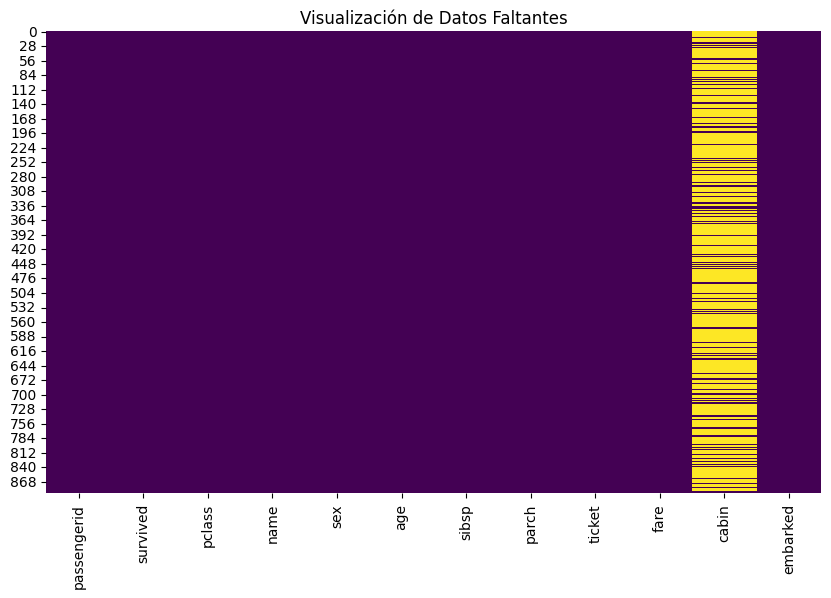

In [ ]:
# Visualización de datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Datos Faltantes')
plt.show()

Podemos observar que las columnas Age, Cabin y Embarked tienen valores faltantes. La columna Cabin tiene una gran cantidad de datos faltantes, lo que podría afectar el análisis.

# Determinar Variables Dependientes e Independientes

In [ ]:
# Definir la variable dependiente
dependent_var = 'survived'

# Definir las variables independientes
independent_vars = df.columns.tolist()
independent_vars.remove(dependent_var)

# Mostrar la variable dependiente y las variables independientes
print("Variable dependiente:")
print(dependent_var)
print("\nVariables independientes:")
print(independent_vars)

Variable dependiente:
survived

Variables independientes:
['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


Variable dependiente es: survived: Indicador de supervivencia (0 = No, 1 = Sí).

Variables independientes son:

- passengerid: Identificador único para cada pasajero.
- pclass: Clase del billete (1 = Primera, 2 = Segunda, 3 = Tercera).
- name: Nombre del pasajero.
- sex: Sexo del pasajero.
- age: Edad del pasajero.
- sibsp: Número de hermanos/esposos a bordo.
- parch: Número de padres/hijos a bordo.
- ticket: Número del billete.
- fare: Tarifa del billete.
- cabin: Número de cabina.
- embarked: Puerto de embarque.

# Normally Test

In [ ]:
from scipy.stats import shapiro

for col in df.select_dtypes("number"):
  _, pvalue = shapiro(df[col], nan_policy='omit')
  if pvalue < 0.05:
    print(f"la variable {col} no tiene una distribución normal.")
  else:
    print(f"la variable {col} puede que tenga una distribución normal.")

  print(80*"-")

la variable passengerid no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable survived no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable pclass no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable age no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable sibsp no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable parch no tiene una distribución normal.
--------------------------------------------------------------------------------
la variable fare no tiene una distribución normal.
--------------------------------------------------------------------------------


# Distribuciones

## 1. Distribución por Puerto de Embarque (embarked)

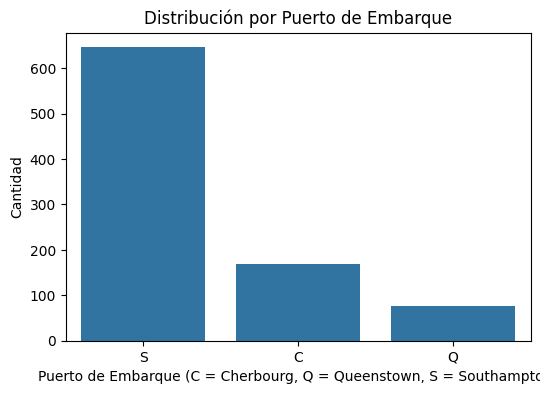

In [ ]:
# Variable 'embarked'
plt.figure(figsize=(6, 4))
sns.countplot(x='embarked', data=df)
plt.title('Distribución por Puerto de Embarque')
plt.xlabel('Puerto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Cantidad')
plt.show()

La mayoría de los pasajeros embarcaron en Southampton (S), seguido de Cherbourg (C) y Queenstown (Q). Esto podría ser relevante para el análisis de supervivencia.

## 2. Distribución de Supervivientes (survived)

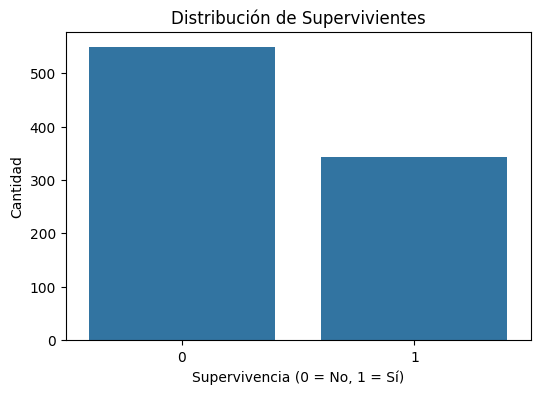

In [ ]:
# Análisis Univariado

# Variable 'survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Distribución de Supervivientes')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

La mayoría de los pasajeros no sobrevivieron (0), mientras que una menor cantidad sí lo hizo (1). Esto indica un desequilibrio en la variable objetivo.

## 3. Distribución de Clases (pclass)

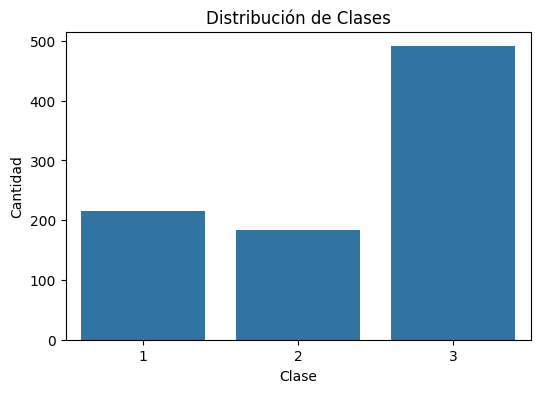

In [ ]:
# Variable 'pclass'
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', data=df)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

La mayoría de los pasajeros viajaban en tercera clase (3), seguida de primera clase (1) y segunda clase (2). Esto podría influir en las tasas de supervivencia.

## 4. Distribución por Sexo (sex)

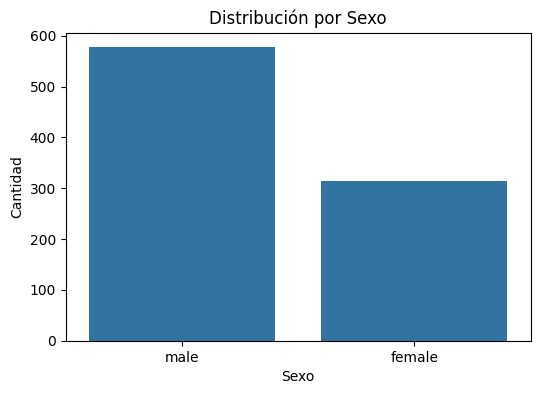

In [ ]:
# Variable 'sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

Hay más pasajeros masculinos que femeninos en el dataset. Esto podría ser relevante para el análisis de supervivencia.

## 5. Distribución de Edad (age)

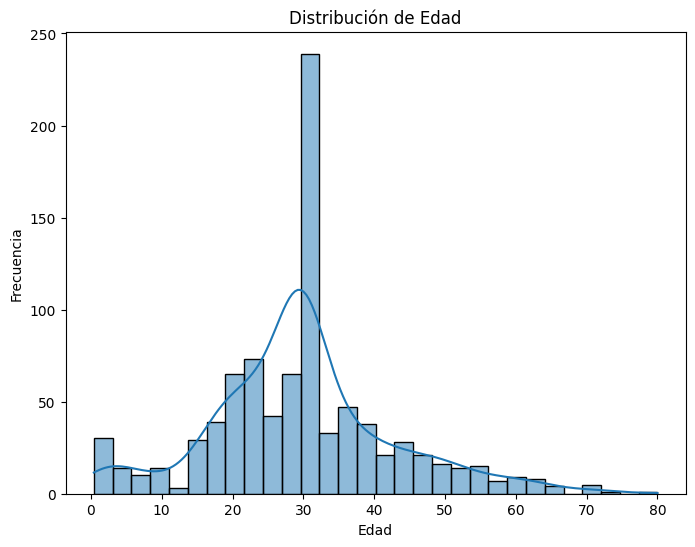

In [ ]:
# Variable 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

La distribución de edades muestra una mayor concentración de pasajeros jóvenes y adultos jóvenes. Hay algunos picos en edades específicas, lo que podría ser interesante para el análisis de supervivencia.

## 6. Distribución de Hermanos/Esposos a Bordo (sibsp)

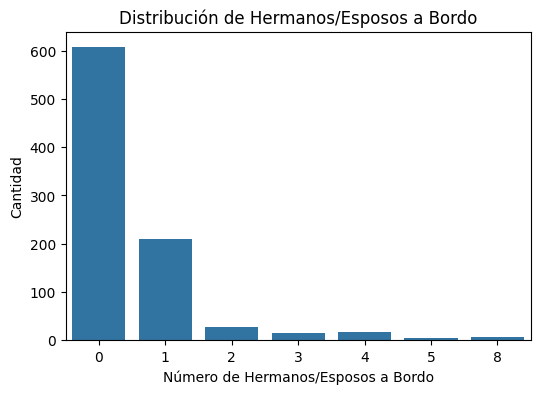

In [ ]:
# Variable 'sibsp'
plt.figure(figsize=(6, 4))
sns.countplot(x='sibsp', data=df)
plt.title('Distribución de Hermanos/Esposos a Bordo')
plt.xlabel('Número de Hermanos/Esposos a Bordo')
plt.ylabel('Cantidad')
plt.show()

La mayoría de los pasajeros no tenían hermanos o esposos a bordo (0), seguido de aquellos con uno o dos. Esto podría influir en las tasas de supervivencia.

## 7. Distribución de Padres/Hijos a Bordo (parch)

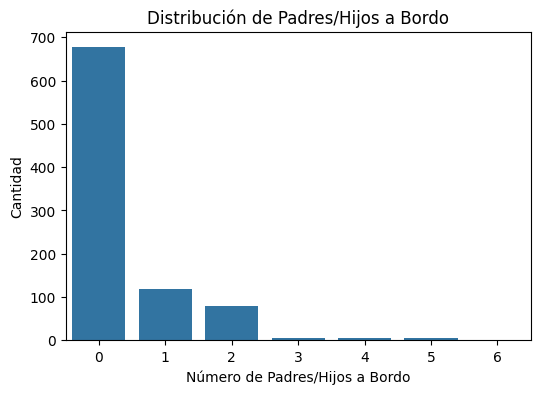

In [ ]:
# Variable 'parch'
plt.figure(figsize=(6, 4))
sns.countplot(x='parch', data=df)
plt.title('Distribución de Padres/Hijos a Bordo')
plt.xlabel('Número de Padres/Hijos a Bordo')
plt.ylabel('Cantidad')
plt.show()

La mayoría de los pasajeros no tenían padres o hijos a bordo (0), seguido de aquellos con uno o dos. Esto también podría influir en las tasas de supervivencia.

## 8. Distribución de Tarifas (fare)

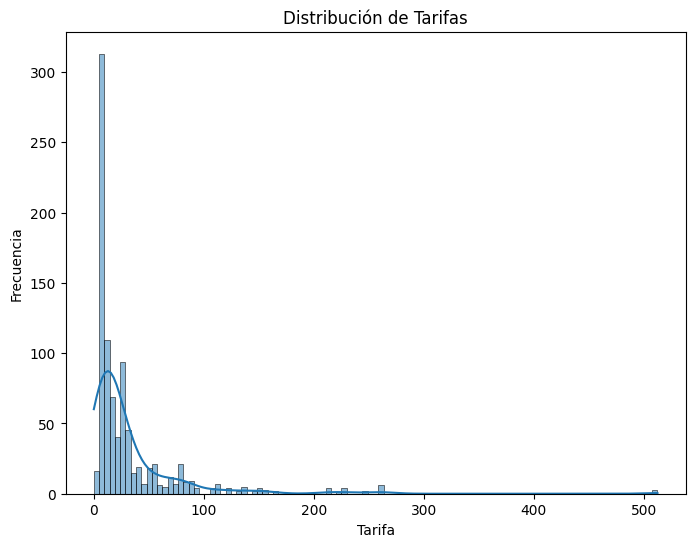

In [ ]:
# Variable 'fare'
plt.figure(figsize=(8, 6))
sns.histplot(df['fare'], kde=True)
plt.title('Distribución de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los pasajeros pagaron tarifas bajas, con algunos valores atípicos de tarifas muy altas. Esto podría estar relacionado con la clase de los pasajeros y su probabilidad de supervivencia.

# Análisis Univariable


In [ ]:
df.describe(include='object')

,name,sex,ticket,cabin,embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,646


## Análisis de cada variable categórica:

- name: Cada pasajero tiene un nombre único.
- sex: Hay dos categorías: male (577) y female (314).
- ticket: Hay 681 tickets únicos, con el ticket más común (347082) apareciendo 7 veces.
- cabin: Hay 147 cabinas únicas, con la cabina más común (B96 B98) apareciendo 4 veces.
- embarked: Hay tres puertos de embarque: S (Southampton, 644), C (Cherbourg, 168) y Q (Queenstown, 77).

In [ ]:
categorical_summary = df.describe(include='object')
categorical_summary

,name,sex,ticket,cabin,embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,646


### 1. Variable name

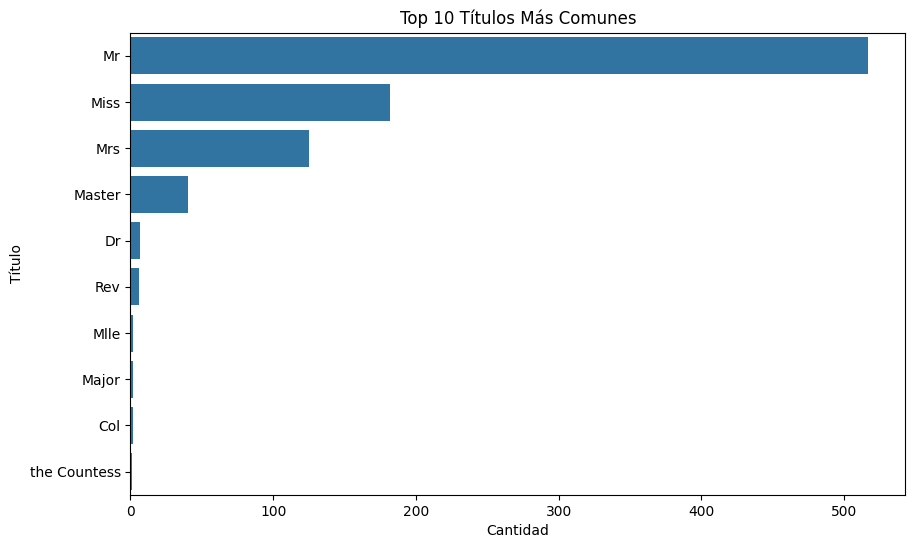

In [ ]:
# Variable name
df['Title'] = df['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


plt.figure(figsize=(10, 6))
top_titles = df['Title'].value_counts().index[:10]
sns.countplot(y='Title', data=df, order=top_titles)
plt.title('Top 10 Títulos Más Comunes')
plt.xlabel('Cantidad')
plt.ylabel('Título')
plt.show()

- Mr: Es el título más común, con 517 apariciones. Esto indica que la mayoría de los pasajeros eran hombres adultos.
- Miss: Es el segundo título más común, con 182 apariciones, indicando una gran cantidad de mujeres jóvenes y solteras.
- Mrs: Con 125 apariciones, este título representa a las mujeres casadas.
- Master: Este título, con 40 apariciones, se utiliza para niños varones.
- Dr, Rev, Major, Col: Estos títulos son menos comunes, con menos de 10 apariciones cada uno, y representan ocupaciones o rangos específicos.
- Títulos únicos: Títulos como the Countess, Capt, Ms, Sir, Lady, Mme, Don, y Jonkheer aparecen solo una vez, indicando pasajeros con títulos muy específicos o de alta distinción.

### 2. Variable sex

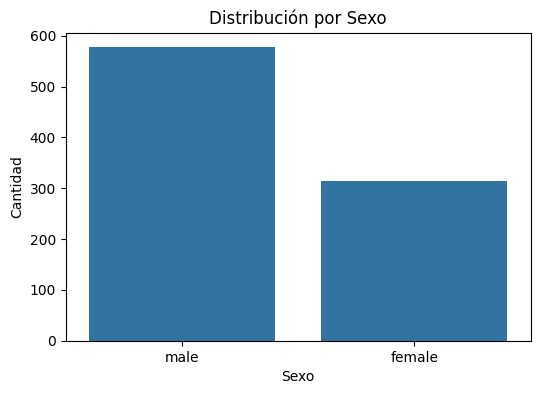

In [ ]:
# Variable 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

Hay más pasajeros masculinos (577) que femeninos (314) en el dataset.

### 3. Variable ticket

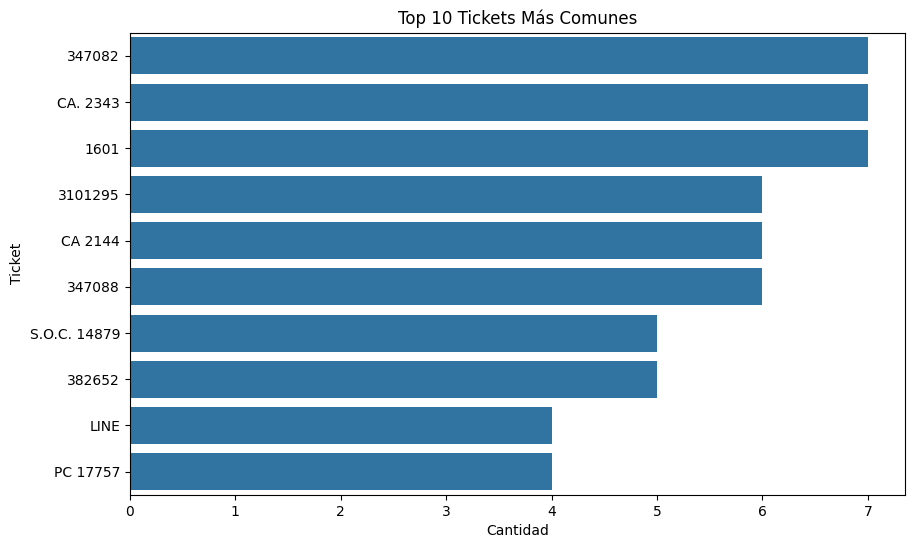

In [ ]:
# Variable 'Ticket'
plt.figure(figsize=(10, 6))
sns.countplot(y='ticket', data=df, order=df['ticket'].value_counts().index[:10])
plt.title('Top 10 Tickets Más Comunes')
plt.xlabel('Cantidad')
plt.ylabel('Ticket')
plt.show()

Los tickets más comunes aparecen muy pocas veces, con el más frecuente (347082) apareciendo solo 7 veces.

### 4. Variable cabin

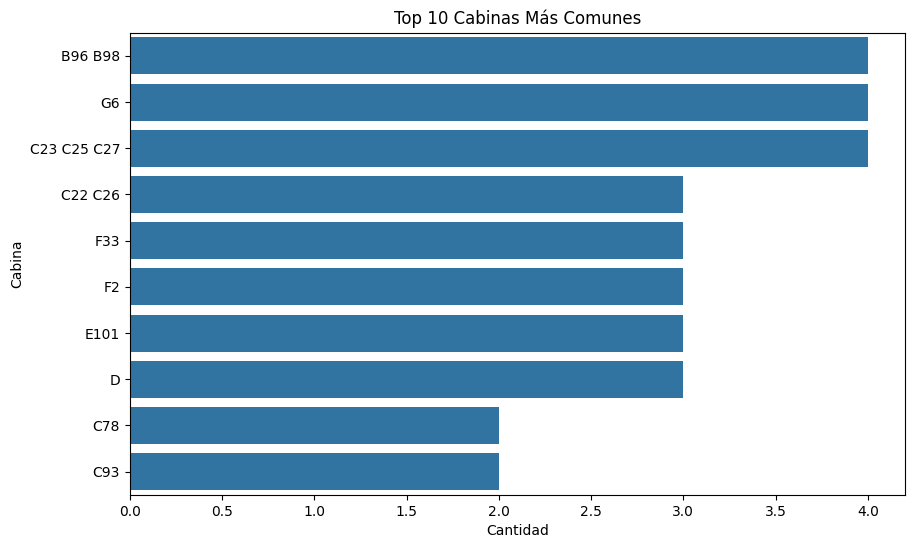

In [ ]:
# Variable 'Cabin'
plt.figure(figsize=(10, 6))
sns.countplot(y='cabin', data=df, order=df['cabin'].value_counts().index[:10])
plt.title('Top 10 Cabinas Más Comunes')
plt.xlabel('Cantidad')
plt.ylabel('Cabina')
plt.show()

La mayoría de las cabinas son únicas, con la cabina más común (B96 B98) apareciendo solo 4 veces. Hay muchos valores faltantes en esta variable.

### 5. Variable embarked

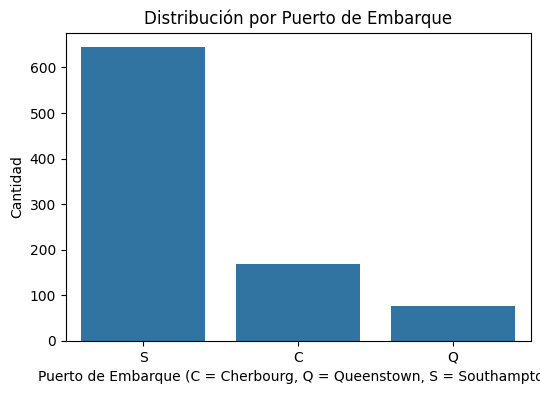

In [ ]:
# Variable 'Embarked'
plt.figure(figsize=(6, 4))
sns.countplot(x='embarked', data=df)
plt.title('Distribución por Puerto de Embarque')
plt.xlabel('Puerto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Cantidad')
plt.show()

La mayoría de los pasajeros embarcaron en Southampton (S), seguido de Cherbourg (C) y Queenstown (Q).

### Representación en porcentajes

In [ ]:
df['name'].value_counts() / len(df)

Aunque cada nombre es único, se trata de una variable categórica porque representa una etiqueta o categoría para cada pasajero. No tiene sentido realizar operaciones matemáticas con nombres, pero sí se pueden agrupar o clasificar.

In [ ]:
df['ticket'].value_counts() / len(df)

Similar a los nombres, los números de billete son etiquetas únicas para cada pasajero. No se pueden ordenar de manera significativa ni realizar operaciones matemáticas con ellos, pero se pueden clasificar en diferentes categorías.

In [ ]:
df['cabin'].value_counts() / len(df)

 La variable cabin se considera categórica porque representa etiquetas únicas para cada cabina, que se pueden clasificar pero no ordenar ni utilizar en cálculos matemáticos.

In [ ]:
df['sex'].value_counts() / len(df)

,count
sex,
male,0.647587
female,0.352413


In [ ]:
df['embarked'].value_counts() / len(df)

,count
embarked,
S,0.722783
C,0.188552
Q,0.086420


- passengerid: Identificador único para cada pasajero (aunque es un - - - -
identificador, es numérico).
- survived: Indicador de supervivencia (0 = No, 1 = Sí).
- pclass: Clase del billete (1 = Primera, 2 = Segunda, 3 = Tercera).
- age: Edad del pasajero.
- sibsp: Número de hermanos/esposos a bordo.
- parch: Número de padres/hijos a bordo.
- fare: Tarifa del billete.

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nFrecuencia de la variable categórica '{col}':")
    print(df[col].value_counts())


Frecuencia de la variable categórica 'name':
name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Frecuencia de la variable categórica 'sex':
sex
male      577
female    314
Name: count, dtype: int64

Frecuencia de la variable categórica 'ticket':
ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Frecuencia de la variable categórica 'cabin':
cabin


## Variables Quantitativas

In [ ]:
df.describe(include='number')

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Las variables cuantitativas son las siguientes:

- passengerid: Identificador único para cada pasajero. Aunque es un - - identificador, es numérico y se puede utilizar para contar o realizar - operaciones de índice. Tiene una distribución uniforme desde 1 hasta 891.
- survived: Indicador de supervivencia (0 = No, 1 = Sí). Aunque es una variable categórica binaria, se representa numéricamente y se puede utilizar en cálculos estadísticos. Con una media de 0.384, lo que indica que aproximadamente el 38.4% de los pasajeros sobrevivieron.
- pclass: Clase del billete (1 = Primera, 2 = Segunda, 3 = Tercera). Representa una categoría ordinal que se puede utilizar en análisis numéricos. La mayoría de los pasajeros viajaban en tercera clase, con una mediana y un tercer cuartil de 3.
- age: Edad del pasajero. Es una variable continua que representa la edad en años. Tiene una distribución aparentemente normal con una media de 29.7 años y una mediana de 28 años. La mayoría de los valores se encuentran entre 20.125 y 38 años, con un rango total de 0.42 a 80 años.
- sibsp: Número de hermanos/esposos a bordo. Es una variable discreta que cuenta el número de familiares a bordo. La mayoría de los pasajeros no tenían hermanos/esposos a bordo, con una mediana de 0 y un tercer cuartil de 1.
- parch: Número de padres/hijos a bordo. Es una variable discreta que cuenta el número de familiares a bordo. Similar a la variable anterior, la mayoría de los pasajeros no tenían padres/hijos a bordo, con una mediana de 0 y un tercer cuartil de 0.
- fare: Tarifa del billete. Es una variable continua que representa el costo del billete en una unidad monetaria. Tiene una distribución sesgada hacia la derecha, con una media de 32.204 y una mediana de 14.454. La mayoría de los valores se encuentran entre 7.910 y 31, con algunos valores extremos que alcanzan hasta 512.329.

## Skewness

In [ ]:
from scipy.stats import skew

# Calcular el skewness de la tarifa
for col in df.select_dtypes(include='number'):

  skewness = skew(df[col].dropna())
  print(f'Skewness de la {col}: {skewness}')

Skewness de la passengerid: 0.0
Skewness de la survived: 0.4777174662568536
Skewness de la pclass: -0.6294858816096934
Skewness de la age: 0.3882898514698657
Skewness de la sibsp: 3.6891276847759507
Skewness de la parch: 2.7444867379203735
Skewness de la fare: 4.7792532923723545


- La variable passengerid tiene una distribución perfectamente simétrica, lo cual es esperado ya que es un identificador único y secuencial.

- La variable survived tiene una ligera asimetría positiva, lo que indica que hay un poco más de pasajeros que no sobrevivieron (valor 0) en comparación con los que sí sobrevivieron (valor 1).

- La variable pclass tiene una asimetría negativa, lo que sugiere que hay más pasajeros en las clases más bajas (clase 3) en comparación con las clases más altas (clase 1).

- La variable age tiene una ligera asimetría positiva, lo que indica que hay una mayor concentración de pasajeros en edades más jóvenes, con algunos valores extremos en edades más avanzadas.

- La variable sibsp tiene una asimetría positiva significativa, lo que indica que la mayoría de los pasajeros viajaban con pocos o ningún hermano/esposo, pero hay algunos pasajeros que viajaban con muchos hermanos/esposos.

- La variable parch también tiene una asimetría positiva significativa, lo que sugiere que la mayoría de los pasajeros viajaban con pocos o ningún padre/hijo, pero hay algunos pasajeros que viajaban con muchos padres/hijos.

- La variable fare tiene una asimetría positiva muy alta, lo que indica que la mayoría de los pasajeros pagaron tarifas bajas, pero hay algunos pasajeros que pagaron tarifas extremadamente altas.

En resumen, las variables sibsp, parch y fare muestran una asimetría positiva significativa, lo que sugiere la presencia de valores extremos (outliers) en el extremo superior de la distribución. La variable pclass muestra una asimetría negativa, indicando una mayor concentración de pasajeros en las clases más bajas. Las variables survived y age tienen una ligera asimetría positiva, lo que indica una distribución ligeramente sesgada hacia valores más bajos.

## Análisis de Outliers

In [ ]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'Title'],
      dtype='object')

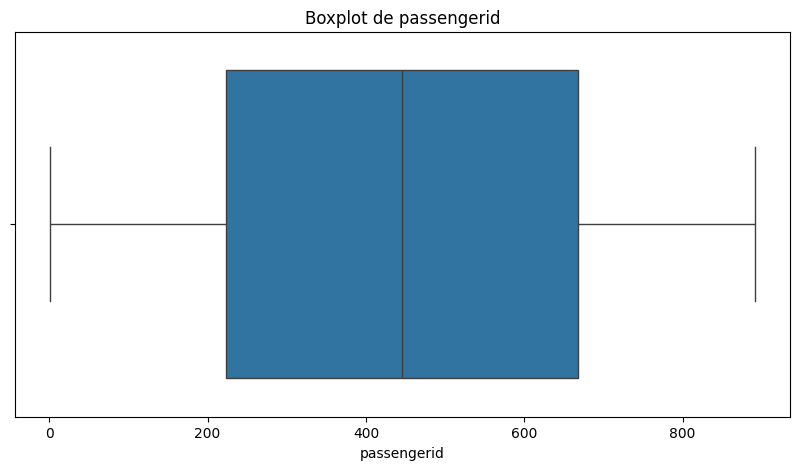

In [ ]:
# Gráfico de caja para passengerid
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['passengerid'])
plt.title('Boxplot de passengerid')
plt.show()

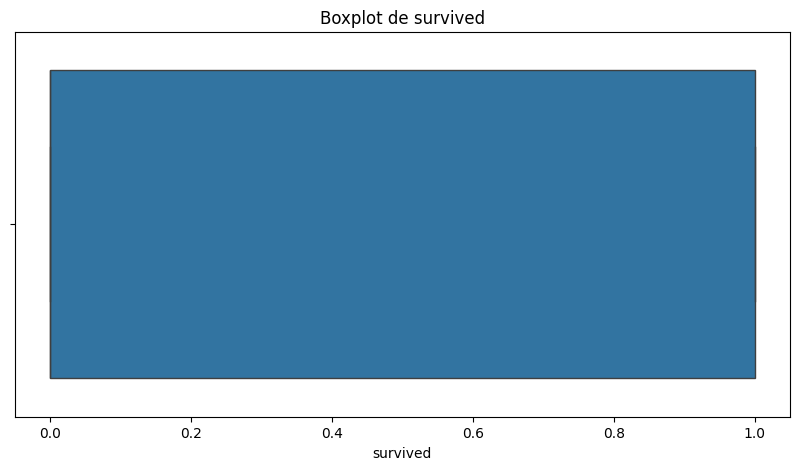

In [ ]:
# Gráfico de caja para survived
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['survived'])
plt.title('Boxplot de survived')
plt.show()

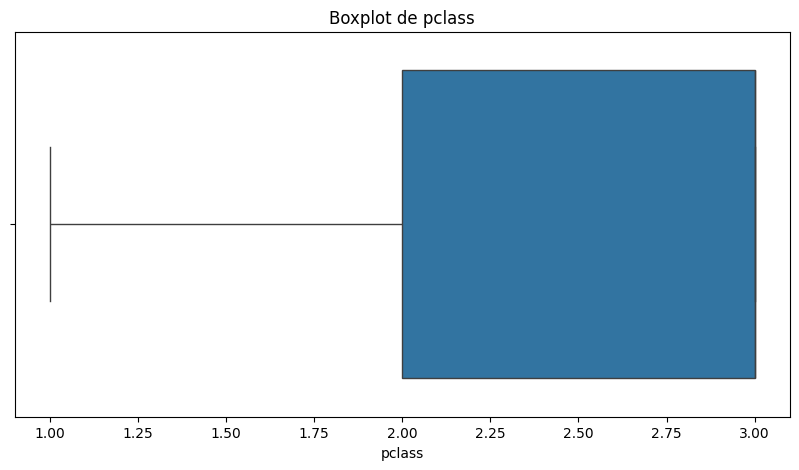

In [ ]:
# Gráfico de caja para pclass
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['pclass'])
plt.title('Boxplot de pclass')
plt.show()

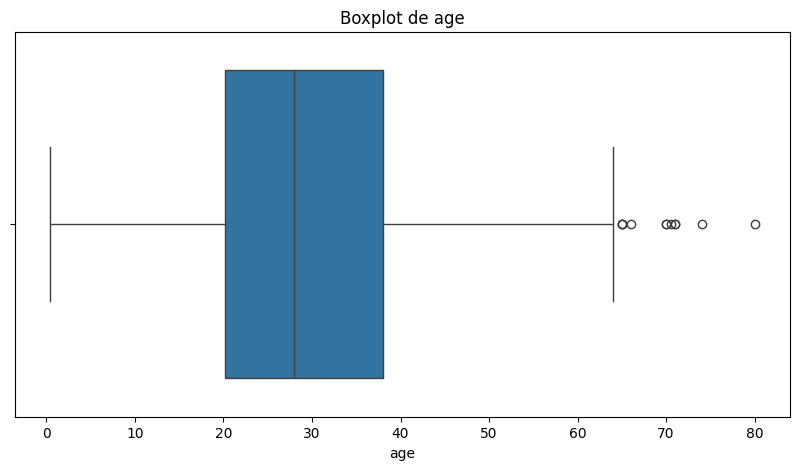

In [ ]:
# Gráfico de caja para age
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['age'])
plt.title('Boxplot de age')
plt.show()

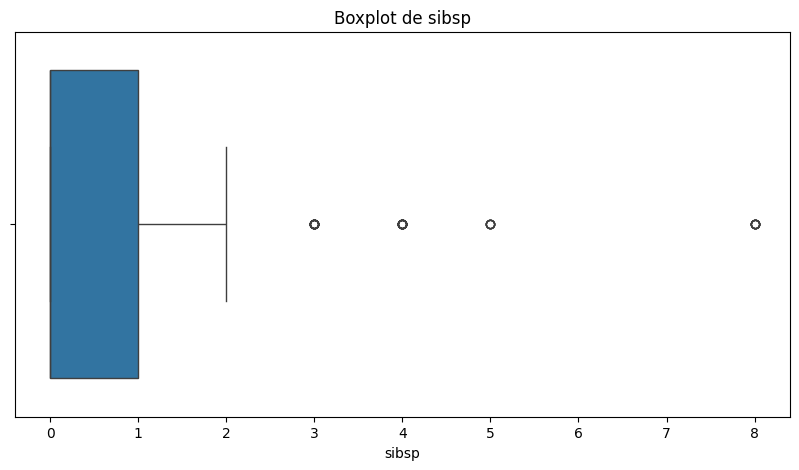

In [ ]:
# Gráfico de caja para sibsp
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['sibsp'])
plt.title('Boxplot de sibsp')
plt.show()

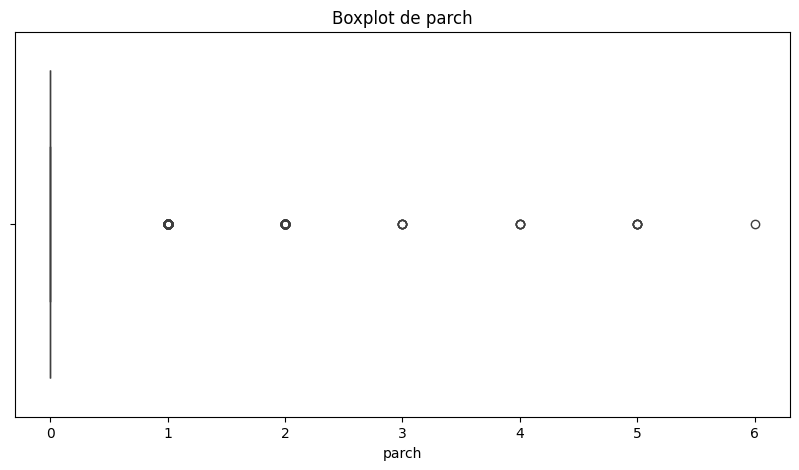

In [ ]:
# Gráfico de caja para parch
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['parch'])
plt.title('Boxplot de parch')
plt.show()

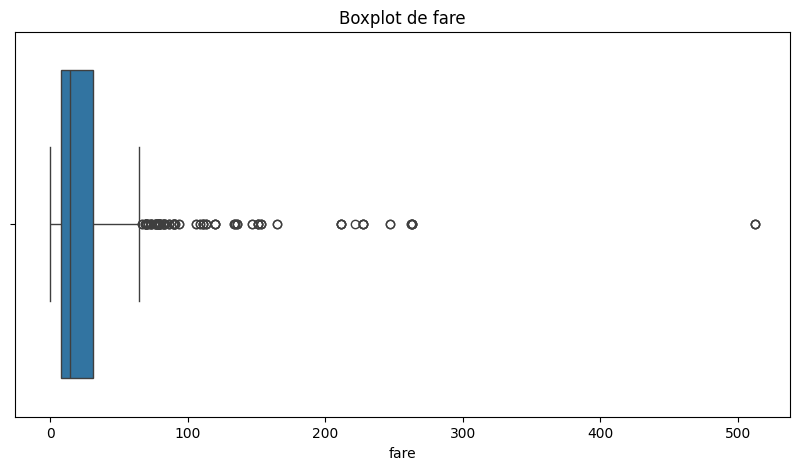

In [ ]:
# Gráfico de caja para fare
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fare'])
plt.title('Boxplot de fare')
plt.show()

# Analisis Bivariable

## Analisis continuas vs continuas

## Tablas de Contingencia: Relación entre la clase del pasajero (pclass) y la supervivencia (survived)

In [ ]:

contingency_table = pd.crosstab(df['pclass'], df['survived'])
print("Tablas de Contingencia entre 'pclass' y 'survived':")
print(contingency_table)

Tablas de Contingencia entre 'pclass' y 'survived':
survived    0    1
pclass            
1          80  136
2          97   87
3         372  119


La tabla muestra la relación entre la clase del pasajero y su supervivencia. Podemos observar que los pasajeros de primera clase (pclass 1) tienen una mayor tasa de supervivencia (136) en comparación con los de segunda (87) y tercera clase (119). Esto sugiere que la clase del pasajero influyó significativamente en las probabilidades de supervivencia.

## Gráficos de Dispersión: Relación entre la edad (age) y la tarifa del billete (fare)

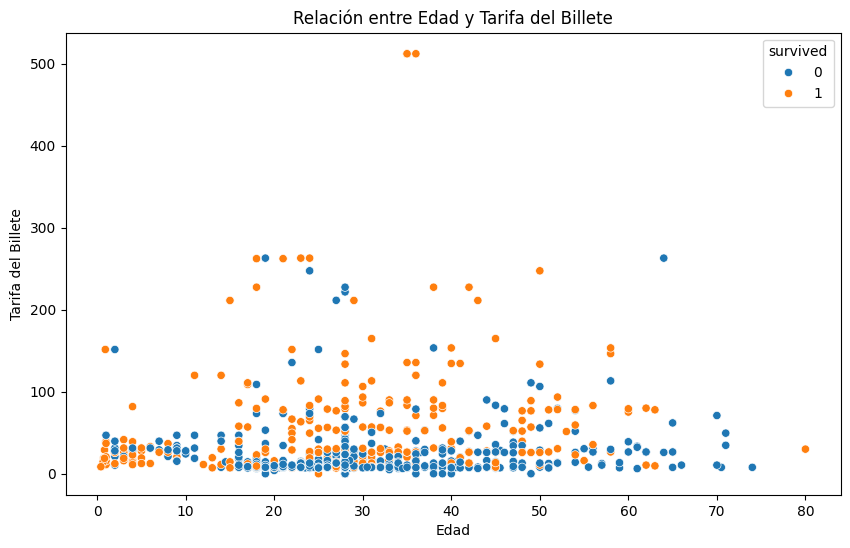

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.title('Relación entre Edad y Tarifa del Billete')
plt.xlabel('Edad')
plt.ylabel('Tarifa del Billete')
plt.show()

El gráfico de dispersión muestra la relación entre la edad y la tarifa del billete, con los puntos coloreados según la supervivencia. No parece haber una relación clara entre la edad y la tarifa del billete. Sin embargo, podemos notar que los pasajeros que pagaron tarifas más altas tienen una mayor probabilidad de supervivencia, lo que podría estar relacionado con la clase del pasajero.


## Diagramas de Cajas: Distribución de la tarifa del billete (fare) por clase del pasajero (pclass)

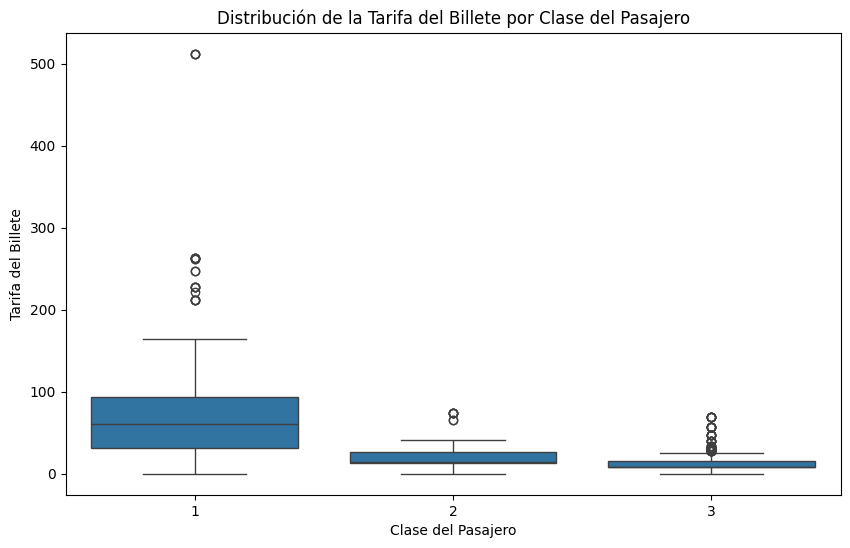

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pclass', y='fare')
plt.title('Distribución de la Tarifa del Billete por Clase del Pasajero')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Tarifa del Billete')
plt.show()

El diagrama de cajas muestra la distribución de las tarifas del billete por clase del pasajero. Los pasajeros de primera clase pagaron tarifas significativamente más altas en comparación con los de segunda y tercera clase. Esto refuerza la idea de que la clase del pasajero está relacionada con la tarifa del billete y, posiblemente, con las probabilidades de supervivencia.

## Gráficos de Barras Apiladas: Supervivencia (survived) por sexo (sex)

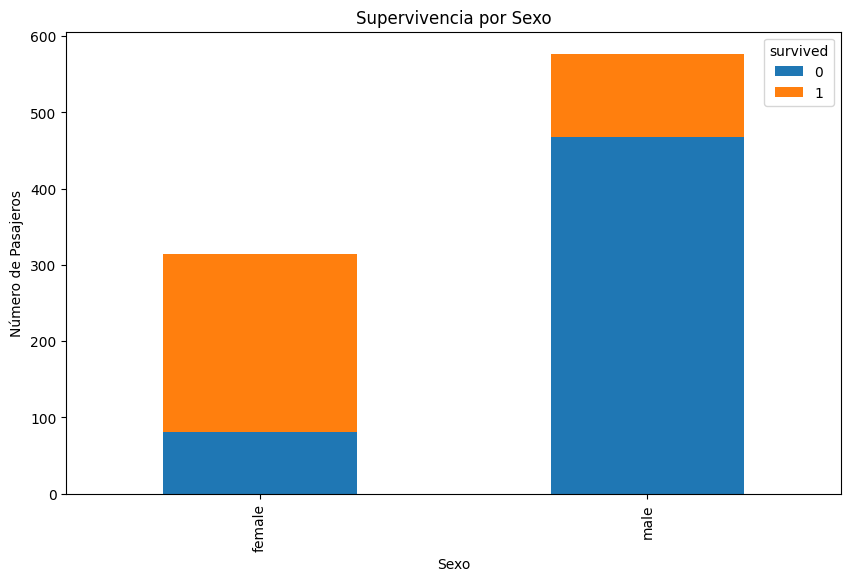

In [ ]:
stacked_bar_data = pd.crosstab(df['sex'], df['survived'])
stacked_bar_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Pasajeros')
plt.show()

El gráfico de barras apiladas muestra la relación entre el sexo y la supervivencia. Podemos observar que un mayor porcentaje de mujeres sobrevivieron en comparación con los hombres. Esto sugiere que el sexo también fue un factor importante en las probabilidades de supervivencia.

## Gráficos de Densidad: Distribución de la edad (age) por supervivencia (survived)

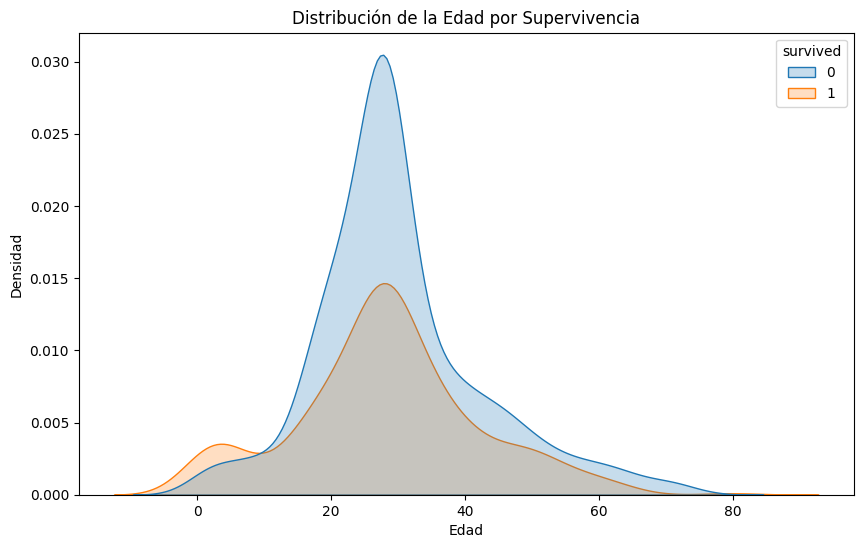

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='survived', fill=True)
plt.title('Distribución de la Edad por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

El gráfico de densidad muestra la distribución de la edad de los pasajeros según su supervivencia. Podemos ver que los niños pequeños y los adultos jóvenes tienen una mayor densidad de supervivencia. Esto podría indicar que los niños y los adultos jóvenes tenían mayores probabilidades de ser rescatados.

## Correlación entre Variables Cuantitativas

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- survived:

Correlación positiva con fare (0.257): Los pasajeros que pagaron tarifas más altas tendieron a tener una mayor tasa de supervivencia.
Correlación negativa con pclass (-0.338): Los pasajeros de clases más bajas (mayor número de clase) tendieron a tener una menor tasa de supervivencia.

- pclass:

Correlación negativa con fare (-0.550): Los pasajeros de clases más altas (menor número de clase) pagaron tarifas más altas.
Correlación negativa con age (-0.369): Los pasajeros de clases más altas tendieron a ser mayores.

- age:

Correlación negativa con sibsp (-0.308): Los pasajeros mayores tendieron a tener menos hermanos/esposos a bordo.
Correlación negativa con parch (-0.189): Los pasajeros mayores tendieron a tener menos padres/hijos a bordo.

- sibsp:

Correlación positiva con parch (0.415): Los pasajeros con más hermanos/esposos a bordo también tendieron a tener más padres/hijos a bordo.
Correlación positiva con fare (0.160): Los pasajeros con más hermanos/esposos a bordo tendieron a pagar tarifas más altas.

- parch:

Correlación positiva con fare (0.216): Los pasajeros con más padres/hijos a bordo tendieron a pagar tarifas más altas.

En resumen, la clase del billete (pclass) tiene una fuerte correlación negativa con la tarifa (fare), lo que indica que los pasajeros de primera clase pagaron tarifas significativamente más altas. La edad (age) muestra correlaciones negativas con sibsp y parch, sugiriendo que los pasajeros mayores tendieron a viajar con menos familiares. La supervivencia (survived) está positivamente correlacionada con la tarifa (fare) y negativamente con la clase del billete (pclass), lo que sugiere que los pasajeros de primera clase y aquellos que pagaron más tenían mayores probabilidades de sobrevivir.

# Análisis Multivariado

## Matriz de Correlación: Correlación entre edad (age), tarifa del billete (fare), y número de hermanos/esposos a bordo (sibsp)

In [ ]:
correlation_matrix = df[['age', 'fare', 'sibsp']].corr()
print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
            age      fare     sibsp
age    1.000000  0.096688 -0.233296
fare   0.096688  1.000000  0.159651
sibsp -0.233296  0.159651  1.000000


La matriz de correlación muestra las relaciones entre varias variables numéricas. Podemos observar que la edad tiene una correlación negativa con el número de hermanos/esposos a bordo (sibsp), lo que sugiere que los pasajeros más jóvenes tendían a viajar con más familiares. La tarifa del billete tiene una correlación positiva con el número de hermanos/esposos a bordo, lo que podría indicar que los grupos familiares pagaban tarifas más altas.

## Gráficos de Pares: Relaciones entre edad (age), tarifa del billete (fare), y número de padres/hijos a bordo (parch)

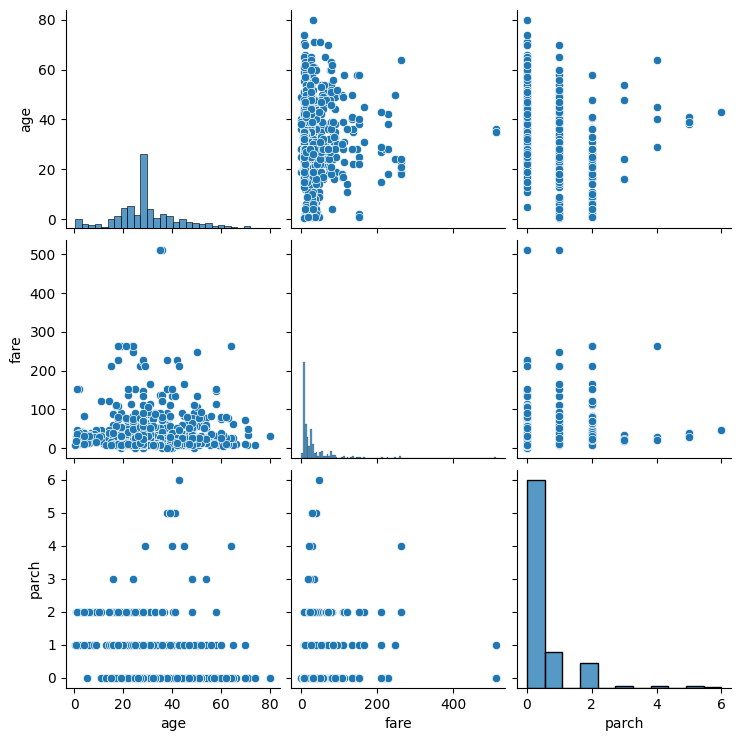

In [ ]:
sns.pairplot(df[['age', 'fare', 'parch']])
plt.show()

Los gráficos de pares muestran las relaciones entre múltiples pares de variables. Podemos observar que no hay relaciones claras entre estas variables, pero los gráficos ayudan a visualizar la distribución y posibles patrones entre ellas.

## Análisis de Componentes Principales (PCA): Reducción de múltiples características numéricas a unas pocas componentes principales

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['age', 'fare', 'sibsp', 'parch']
x = df[features].dropna()
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente principal:
[0.40662092 0.27577972]


El PCA reduce la dimensionalidad de los datos a dos componentes principales, que explican aproximadamente el 68.6% de la varianza total. Esto significa que estas dos componentes capturan la mayor parte de la información contenida en las variables originales, permitiendo una visualización más sencilla y análisis de los datos.

## Análisis de Clúster: Agrupación de pasajeros basada en características como edad (age), tarifa del billete (fare), y clase del pasajero (pclass)

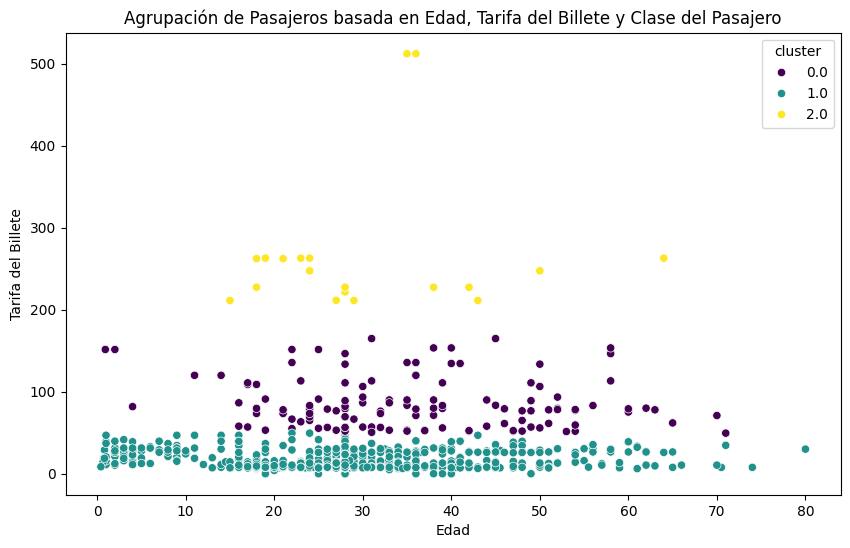

In [ ]:
from sklearn.cluster import KMeans

cluster_features = df[['age', 'fare', 'pclass']].dropna()
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_features)
df.loc[cluster_features.index, 'cluster'] = kmeans.predict(cluster_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.loc[cluster_features.index], x='age', y='fare', hue='cluster', palette='viridis')
plt.title('Agrupación de Pasajeros basada en Edad, Tarifa del Billete y Clase del Pasajero')
plt.xlabel('Edad')
plt.ylabel('Tarifa del Billete')
plt.show()

El análisis de clúster agrupa a los pasajeros en tres clústeres basados en su edad, tarifa del billete y clase del pasajero. Podemos observar que los clústeres están bien diferenciados, lo que sugiere que estas características son útiles para agrupar a los pasajeros en grupos similares.

## Regresión Múltiple: Predicción de la supervivencia (survived) basada en edad (age), sexo (sex), y clase del pasajero (pclass)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
regression_features = df[['age', 'sex', 'pclass']].dropna()
target = df.loc[regression_features.index, 'survived']

X_train, X_test, y_train, y_test = train_test_split(regression_features, target, test_size=0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Precisión del modelo de Regresión Múltiple:")
print(accuracy_score(y_test, y_pred))


Precisión del modelo de Regresión Múltiple:
0.8097014925373134


El modelo de regresión múltiple tiene una precisión del 80%, lo que indica que las variables edad, sexo y clase del pasajero son buenos predictores de la supervivencia. Esto refuerza la idea de que estos factores influyeron significativamente en las probabilidades de supervivencia de los pasajeros.

# Conclusión General del Análisis

Limpieza de Datos:Se imputaron valores faltantes en las columnas age y embarked con la media y la moda, respectivamente.
La columna cabin tiene una gran cantidad de valores faltantes, lo que podría afectar el análisis.
Análisis Univariado:

Distribución de Variables: La mayoría de los pasajeros embarcaron en Southampton, viajaban en tercera clase y eran hombres.

Supervivencia: La mayoría de los pasajeros no sobrevivieron, indicando un desequilibrio en la variable objetivo.

Edad y Tarifas: La distribución de edades muestra una mayor concentración de pasajeros jóvenes y adultos jóvenes. La mayoría de los pasajeros pagaron tarifas bajas, con algunos valores atípicos de tarifas muy altas.

Análisis Bivariado: Relaciones entre Variables:Los pasajeros de primera clase tienen una mayor tasa de supervivencia en comparación con los de segunda y tercera clase. Los pasajeros que pagaron tarifas más altas tienen una mayor probabilidad de supervivencia. Un mayor porcentaje de mujeres sobrevivieron en comparación con los hombres.

Gráficos de Dispersión y Cajas: No hay una relación clara entre la edad y la tarifa del billete, pero los pasajeros de primera clase pagaron tarifas significativamente más altas.

Análisis Multivariado:

- PCA: La reducción de dimensionalidad a dos componentes principales explica aproximadamente el 68.6% de la varianza total.
- Análisis de Clúster: Los pasajeros se agrupan en tres clústeres basados en su edad, tarifa del billete y clase del pasajero.
- Regresión Múltiple: Las variables edad, sexo y clase del pasajero son buenos predictores de la supervivencia, con una precisión del 80%.